In [ ]:
# Deep Learning Assignment.
# 1. Building Simple CNN Model From Scratch.
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
""" The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class.
The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them. """
# Download and prepare the CIFAR10 dataset
(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()
print(train_images)

print(train_labels)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

In [ ]:
# print(len(train_images)) # 50000
# print(len(test_images)) # 10000

In [ ]:
# Normalize pixel values to be between 0 and 1.

train_images, test_images = train_images / 255.0, test_images / 250.0

print(train_images)
print(test_images)

[[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.70588235 0.54509804 0.37647059]
   [0.6

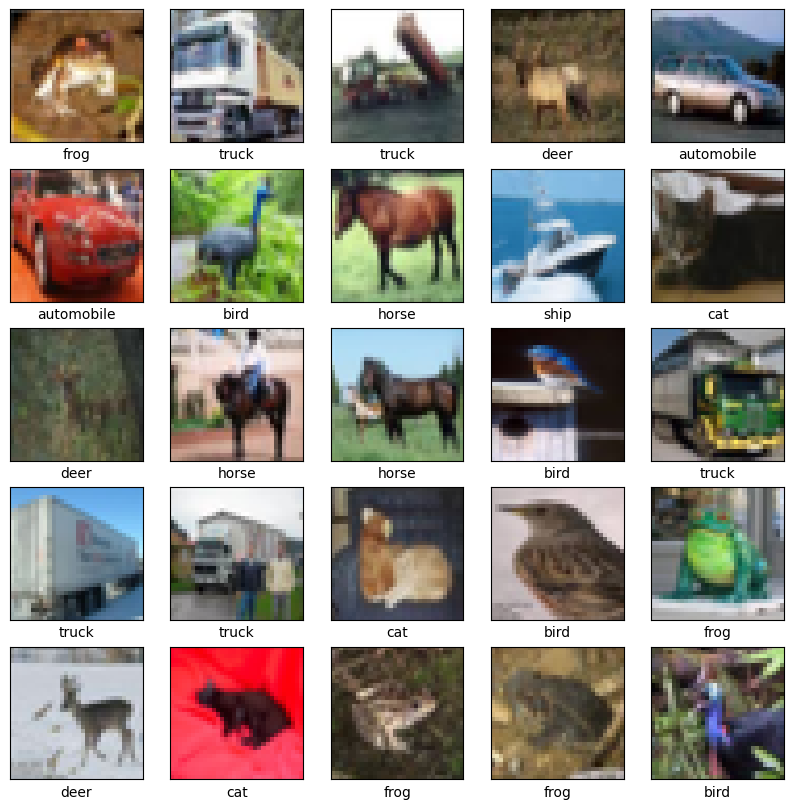

In [ ]:
# To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  # The CIFAR labels happen to be arrays, which is why we need the extra index.
  plt.xlabel(class_names[train_labels[i][0]])

plt.show()

In [ ]:
"""Create the convolutional base, 

The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.
As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, 
color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images.
You can do this by passing the argument input_shape to your first layer. """
# This creates an empty sequential model object that we can use to build our model by adding layers one by one.
model=models.Sequential()

"""This line of code adds a 2D convolutional layer to the Keras model with 32 output filters, a window size of 3x3 pixels, a ReLU activation function, and an input 
shape of (32,32,3). This layer can then be followed by other layers to build a deep learning model for image processing tasks such as image classification or 
object detection"""
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))

""" This line of code adds a max pooling layer to the Keras model with a window size of 2x2 pixels. 
The purpose of this layer is to reduce the spatial dimensions of the feature maps and retain the most important features. 
This helps to improve the efficiency of the model by reducing the number of parameters and computations required. 
The output of the max pooling layer can then be passed on to other layers in the model, such as another convolutional layer or a fully connected layer, 
to further extract features and make predictions"""
model.add(layers.MaxPooling2D((2,2)))

""" This line of code adds a 2D convolutional layer to the Keras model with 64 output filters, a window size of 3x3 pixels, and a ReLU activation function. 
The purpose of this layer is to extract features from the input image using the learned filters. 
The output of this layer can then be passed on to other layers in the model
"""
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [ ]:
# Lets Display the Architecture so far.
model.summary()

""" Below, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). 
The width and height dimensions tend to shrink as you go deeper in the network. 
The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). 
Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.
"""

# Explanation of the below output to understand total number of parameters.

"""
conv2d_3: This is the first convolutional layer with 32 filters, a 3x3 kernel size, and a ReLU activation function. 
The input shape is (30, 30, 3) because it follows a max pooling layer with a pool size of (2,2), which reduces the dimensions of the input image by a factor of 2. 
The number of parameters in this layer is 896.

max_pooling2d_2: This is the first max pooling layer with a pool size of (2,2). 
It reduces the spatial dimensions of the feature maps output by the first convolutional layer by a factor of 2, resulting in an output shape of (15, 15, 32).

conv2d_4: This is the second convolutional layer with 64 filters, a 3x3 kernel size, and a ReLU activation function. 
The number of parameters in this layer is 18,496.

max_pooling2d_3: This is the second max pooling layer with a pool size of (2,2). 
It further reduces the spatial dimensions of the feature maps output by the second convolutional layer by a factor of 2, resulting in an output shape of (6, 6, 64).

conv2d_5: This is the third convolutional layer with 64 filters, a 3x3 kernel size, and a ReLU activation function. The number of parameters in this layer is 36,928.

flatten_1: This layer flattens the output of the third convolutional layer to a one-dimensional vector of size 1024. 
This prepares the feature maps for input to the fully connected layers.

dense_2: This is the first fully connected (dense) layer with 64 units and a ReLU activation function. The number of parameters in this layer is 65,600.

dense_3: This is the output layer with 10 units, representing the 10 possible classes in the classification problem. 
It uses a softmax activation function to produce a probability distribution over the classes. The number of parameters in this layer is 650.

Overall, this model architecture is a common example of a convolutional neural network for image classification.
The convolutional layers extract features from the input images, and the fully connected layers use these features to make predictions 
about the class of the image. The max pooling layers are used to reduce the spatial dimensions of the feature maps and improve the computational 
efficiency of the model """

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

'\nconv2d_3: This is the first convolutional layer with 32 filters, a 3x3 kernel size, and a ReLU activation function. \nThe input shape is (30, 30, 3) because it follows a max pooling layer with a pool size of (2,2), which reduces the dimensions of the input image by a factor of 2. \nThe number of parameters in this layer is 896.\n\nmax_pooling2d_2: This is the first max pooling layer with a pool size of (2,2). \nIt reduces the spatial dimensions of the feature maps output by the first convolutional layer by a factor of 2, resulting in an output shape of (15, 15, 32).\n\nconv2d_4: This is the second convolutional layer with 64 filters, a 3x3 kernel size, and a ReLU activation function. \nThe number of parameters in this layer is 18,496.\n\nmax_pooling2d_3: This is the second max pooling layer with a pool size of (2,2). \nIt further reduces the spatial dimensions of the feature maps output by the second convolutional layer by a factor of 2, resulting in an output shape of (6, 6, 64).\n

In [ ]:
"""
Add Dense layers on top
-> To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) 
   into one or more Dense layers to perform classification. 
-> Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. 
-> First, you will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. 
-> CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.
"""
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10)) # Final outpur with 10 Classes.


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [ ]:
"""
The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.
"""

'\nThe network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.\n'

Epoch 1/50
1563/1563 [==============================] - 11s 5ms/step - loss: 0.1539 - accuracy: 0.9457 - val_loss: 2.4230 - val_accuracy: 0.6710
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1310 - accuracy: 0.9534 - val_loss: 2.6721 - val_accuracy: 0.6706
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1431 - accuracy: 0.9495 - val_loss: 2.4190 - val_accuracy: 0.6749
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1346 - accuracy: 0.9527 - val_loss: 2.4092 - val_accuracy: 0.6836
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1228 - accuracy: 0.9560 - val_loss: 2.5005 - val_accuracy: 0.6938
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1360 - accuracy: 0.9527 - val_loss: 2.5254 - val_accuracy: 0.6857
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1309 - accuracy: 0.9553 - val_loss: 2.7189 - val_accuracy

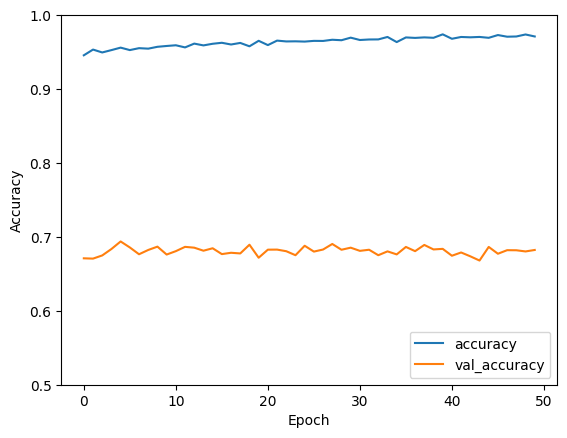

In [ ]:
# Compile and train the model
# Using ADAM(Adaptive Moment Estimation) as optimizer.

# Example of steps_per_epoch.

# Train_Images = 50000 and Test_Images = 10000.

# Trying with 50 Epochs and default batch_size and steps_per_epoch.

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history=model.fit(train_images,train_labels,epochs=50,
                  validation_data=(test_images,test_labels))


# Evaluate the model
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)
print("Test_Loss is:",test_loss)
print("Test_acc is:",test_acc)


# Here in this case, Model is OverFitting as it works pretty well on Training and but not on validation data as per the 50th epoch.
# In this case Model is OverFitting.
#loss: 0.0907 - accuracy: 0.9711 - val_loss: 3.4472 - val_accuracy: 0.682

In [ ]:
# Compile and train the model
# Using ADAM(Adaptive Moment Estimation) as optimizer.

# Example of steps_per_epoch.

# Train_Images = 50000 and Test_Images = 10000.
"""
steps_per_epoch = total_training_samples // batch_size
steps_per_epoch = 50000 // 64
steps_per_epoch = 719 """

""" Let's say we have a dataset of 10,000 images and we are training a neural network with a batch size of 32. 
We want to train the model for 50 epochs, and we want to process the entire training dataset once per epoch. 
In this case, the steps_per_epoch parameter would be set as follows: """

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history=model.fit(train_images,train_labels,epochs=10,
                  validation_data=(test_images,test_labels),batch_size=64, steps_per_epoch=719)


# loss: 0.5139 - accuracy: 0.8186 - val_loss: 0.9509 - val_accuracy: 0.7113

# In this case, Model is Good in this case, as it works well on Training data as well as Validation Data.

Epoch 1/10
719/719 [==============================] - 6s 5ms/step - loss: 0.7229 - accuracy: 0.7460 - val_loss: 0.8785 - val_accuracy: 0.7018
Epoch 2/10
719/719 [==============================] - 4s 5ms/step - loss: 0.6932 - accuracy: 0.7573 - val_loss: 0.8551 - val_accuracy: 0.7104
Epoch 3/10
719/719 [==============================] - 4s 6ms/step - loss: 0.6660 - accuracy: 0.7655 - val_loss: 0.9108 - val_accuracy: 0.6991
Epoch 4/10
719/719 [==============================] - 4s 5ms/step - loss: 0.6360 - accuracy: 0.7756 - val_loss: 0.8417 - val_accuracy: 0.7206
Epoch 5/10
719/719 [==============================] - 4s 5ms/step - loss: 0.6224 - accuracy: 0.7825 - val_loss: 0.8899 - val_accuracy: 0.7090
Epoch 6/10
719/719 [==============================] - 4s 6ms/step - loss: 0.5952 - accuracy: 0.7916 - val_loss: 0.8962 - val_accuracy: 0.7129
Epoch 7/10
719/719 [==============================] - 4s 5ms/step - loss: 0.5785 - accuracy: 0.7972 - val_loss: 0.8676 - val_accuracy: 0.7162
Epoch 

313/313 - 1s - loss: 0.9509 - accuracy: 0.7113 - 728ms/epoch - 2ms/step


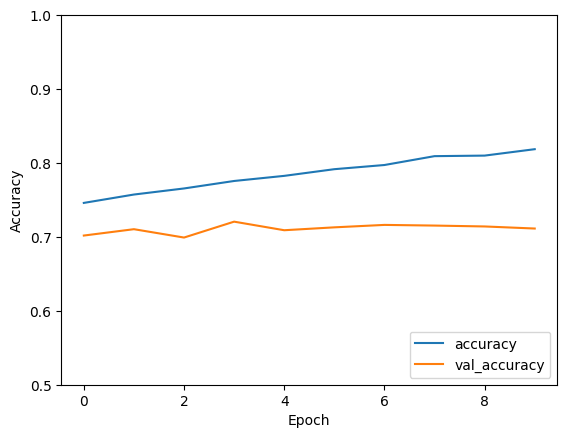

In [ ]:
# Evaluate the model
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)


In [ ]:
print(test_acc)

0.7113000154495239


Epoch 1/20
1563/1563 [==============================] - 11s 5ms/step - loss: 0.2522 - accuracy: 0.9090 - val_loss: 1.5284 - val_accuracy: 0.6959
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2357 - accuracy: 0.9156 - val_loss: 1.5407 - val_accuracy: 0.6938
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2242 - accuracy: 0.9192 - val_loss: 1.6885 - val_accuracy: 0.6840
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2172 - accuracy: 0.9200 - val_loss: 1.6525 - val_accuracy: 0.6976
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2072 - accuracy: 0.9238 - val_loss: 1.8094 - val_accuracy: 0.6855
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2089 - accuracy: 0.9245 - val_loss: 1.7213 - val_accuracy: 0.6949
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1944 - accuracy: 0.9295 - val_loss: 1.8156 - val_accuracy

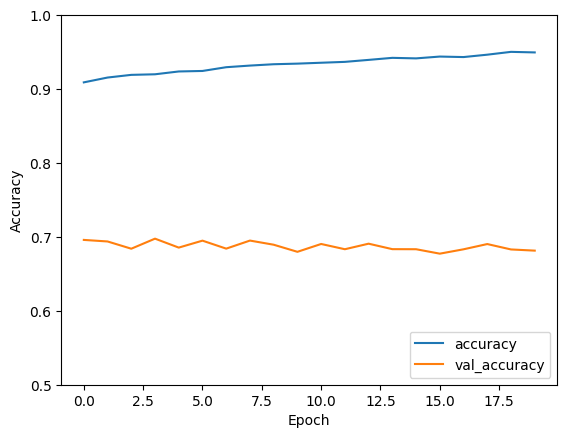

In [ ]:
# Compile and train the model
# Using ADAM(Adaptive Moment Estimation) as optimizer.

# Example of steps_per_epoch.

# Train_Images = 50000 and Test_Images = 10000.


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history=model.fit(train_images,train_labels,epochs=20,
                  validation_data=(test_images,test_labels))


# Evaluate the model
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)
print("Test_Loss is:",test_loss)
print("Test_acc is:",test_acc)


# This Combination also leads to overfitting of models.
# accuracy: 0.9495 - val_loss: 2.2776 - val_accuracy: 0.6814

In [ ]:
""" Your simple CNN has achieved a test accuracy of over 70%. 
Not bad for a few lines of code! For another CNN style, 
check out the TensorFlow 2 quickstart for experts example that uses the Keras subclassing API and tf.GradientTape """

' Your simple CNN has achieved a test accuracy of over 70%. \nNot bad for a few lines of code! For another CNN style, \ncheck out the TensorFlow 2 quickstart for experts example that uses the Keras subclassing API and tf.GradientTape '

# Implemeting Stochastic Gradient Optimizer

Epoch 1/50
1563/1563 [==============================] - 11s 6ms/step - loss: 0.3018 - accuracy: 0.9262 - val_loss: 4.2639 - val_accuracy: 0.6002
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0912 - accuracy: 0.9726 - val_loss: 3.5069 - val_accuracy: 0.6816
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1579 - accuracy: 0.9638 - val_loss: 3.1540 - val_accuracy: 0.6552
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1130 - accuracy: 0.9642 - val_loss: 3.4939 - val_accuracy: 0.6800
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0251 - accuracy: 0.9918 - val_loss: 4.0093 - val_accuracy: 0.6841
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0131 - accuracy: 0.9957 - val_loss: 4.1305 - val_accuracy: 0.6862
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0055 - accuracy: 0.9985 - val_loss: 4.1302 - val_accuracy

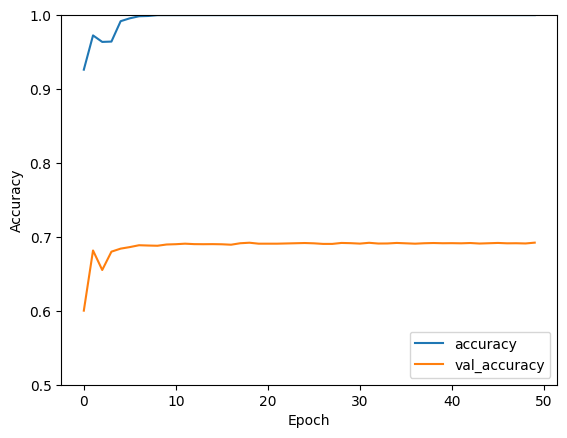

In [ ]:
# Compile and train the model
# Using Stochastic Gradient as optimizer.

# Example of steps_per_epoch.

# Train_Images = 50000 and Test_Images = 10000.

# Trying with 50 Epochs and default batch_size and steps_per_epoch.

model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history=model.fit(train_images,train_labels,epochs=50,
                  validation_data=(test_images,test_labels))


# Evaluate the model
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)
print("Test_Loss is:",test_loss)
print("Test_acc is:",test_acc)

# Here in this case, Model is OverFitting as it works pretty well on Training and but not on validation data as per the 50th epoch.
# In this case Model is OverFitting.
#loss: 1.3421e-04 - accuracy: 1.0000 - val_loss: 4.9596 - val_accuracy: 0.6922

Epoch 1/10
719/719 [==============================] - 6s 7ms/step - loss: 1.2838e-04 - accuracy: 1.0000 - val_loss: 4.9647 - val_accuracy: 0.6917
Epoch 2/10
719/719 [==============================] - 4s 6ms/step - loss: 1.2841e-04 - accuracy: 1.0000 - val_loss: 4.9694 - val_accuracy: 0.6918
Epoch 3/10
719/719 [==============================] - 3s 5ms/step - loss: 1.3166e-04 - accuracy: 1.0000 - val_loss: 4.9728 - val_accuracy: 0.6919
Epoch 4/10
719/719 [==============================] - 3s 5ms/step - loss: 1.2666e-04 - accuracy: 1.0000 - val_loss: 4.9757 - val_accuracy: 0.6917
Epoch 5/10
719/719 [==============================] - 4s 6ms/step - loss: 1.2038e-04 - accuracy: 1.0000 - val_loss: 4.9803 - val_accuracy: 0.6905
Epoch 6/10
719/719 [==============================] - 3s 5ms/step - loss: 1.2469e-04 - accuracy: 1.0000 - val_loss: 4.9849 - val_accuracy: 0.6915
Epoch 7/10
719/719 [==============================] - 4s 5ms/step - loss: 1.2722e-04 - accuracy: 1.0000 - val_loss: 4.9890 -

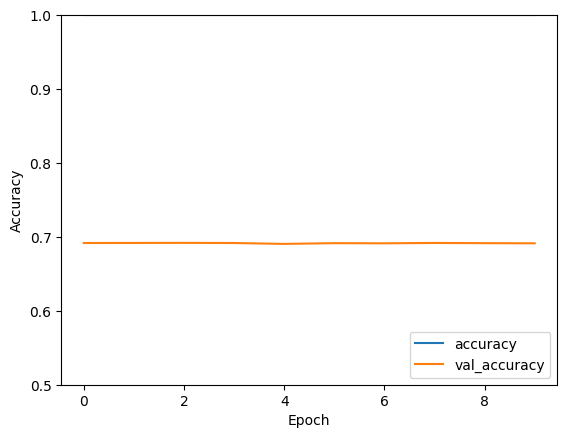

In [ ]:
# Compile and train the model
# Using SGD (Stochastic Gradient Descent) as Optimizer.

# Example of steps_per_epoch.

# Train_Images = 50000 and Test_Images = 10000.
"""
steps_per_epoch = total_training_samples // batch_size
steps_per_epoch = 50000 // 64
steps_per_epoch = 719 """

""" Let's say we have a dataset of 10,000 images and we are training a neural network with a batch size of 32. 
We want to train the model for 50 epochs, and we want to process the entire training dataset once per epoch. 
In this case, the steps_per_epoch parameter would be set as follows: """

model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history=model.fit(train_images,train_labels,epochs=10,
                  validation_data=(test_images,test_labels),batch_size=64, steps_per_epoch=719)

# Evaluate the model
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)

print(test_acc)

# loss: 0.5139 - accuracy: 0.8186 - val_loss: 0.9509 - val_accuracy: 0.7113
# Model is overfitted.
# loss: 1.1873e-04 - accuracy: 1.0000 - val_loss: 4.9992 - val_accuracy: 0.6913

Epoch 1/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.2136e-04 - accuracy: 1.0000 - val_loss: 5.0091 - val_accuracy: 0.6919
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1925e-04 - accuracy: 1.0000 - val_loss: 5.0155 - val_accuracy: 0.6919
Epoch 3/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1732e-04 - accuracy: 1.0000 - val_loss: 5.0230 - val_accuracy: 0.6919
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1549e-04 - accuracy: 1.0000 - val_loss: 5.0291 - val_accuracy: 0.6917
Epoch 5/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1362e-04 - accuracy: 1.0000 - val_loss: 5.0380 - val_accuracy: 0.6915
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1177e-04 - accuracy: 1.0000 - val_loss: 5.0463 - val_accuracy: 0.6915
Epoch 7/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1024e-04 - accuracy: 1.0000 - val_

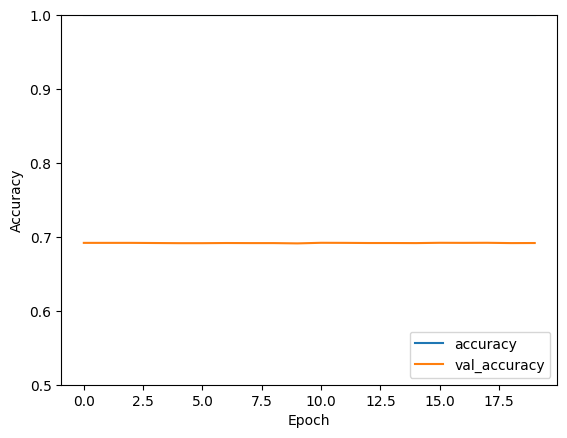

In [ ]:
# Compile and train the model
# Using ADAM(Adaptive Moment Estimation) as optimizer.

# Example of steps_per_epoch.

# Train_Images = 50000 and Test_Images = 10000.


model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history=model.fit(train_images,train_labels,epochs=20,
                  validation_data=(test_images,test_labels))


# Evaluate the model
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)
print("Test_Loss is:",test_loss)
print("Test_acc is:",test_acc)


# This Combination also leads to overfitting of models.
# loss: 9.1581e-05 - accuracy: 1.0000 - val_loss: 5.1423 - val_accuracy: 0.6917

Epoch 1/11
1563/1563 [==============================] - 8s 5ms/step - loss: 6.6569e-05 - accuracy: 1.0000 - val_loss: 5.2952 - val_accuracy: 0.6925
Epoch 2/11
1563/1563 [==============================] - 7s 4ms/step - loss: 6.5983e-05 - accuracy: 1.0000 - val_loss: 5.2998 - val_accuracy: 0.6922
Epoch 3/11
1563/1563 [==============================] - 8s 5ms/step - loss: 6.5294e-05 - accuracy: 1.0000 - val_loss: 5.3060 - val_accuracy: 0.6922
Epoch 4/11
1563/1563 [==============================] - 7s 4ms/step - loss: 6.4693e-05 - accuracy: 1.0000 - val_loss: 5.3107 - val_accuracy: 0.6925
Epoch 5/11
1563/1563 [==============================] - 7s 5ms/step - loss: 6.4102e-05 - accuracy: 1.0000 - val_loss: 5.3129 - val_accuracy: 0.6923
Epoch 6/11
1563/1563 [==============================] - 7s 5ms/step - loss: 6.3660e-05 - accuracy: 1.0000 - val_loss: 5.3192 - val_accuracy: 0.6922
Epoch 7/11
1563/1563 [==============================] - 6s 4ms/step - loss: 6.3028e-05 - accuracy: 1.0000 - val_

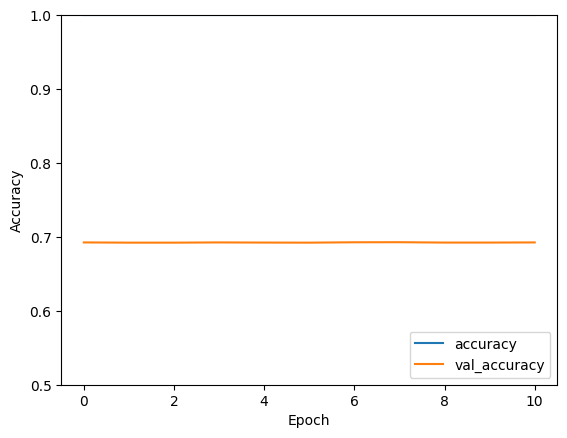

In [ ]:
# Compile and train the model
# Using ADAM(Adaptive Moment Estimation) as optimizer.

# As we see above validation accuracy increases after 11 epochs, IT better stops Training the data.


model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history=model.fit(train_images,train_labels,epochs=11,
                  validation_data=(test_images,test_labels))


# Evaluate the model
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)
print("Test_Loss is:",test_loss)
print("Test_acc is:",test_acc)


# This Combination also leads to overfitting of models.
# loss: 9.1581e-05 - accuracy: 1.0000 - val_loss: 5.1423 - val_accuracy: 0.6917